<h1>Data Analysis and Visualization Home Assignment</h1>
<li>I've tried to outline the steps for you so please make use of the cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run, especially if your computer is not powerful enough. Be patient! 


<ol>
<li>Read the data from <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv">https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv</a>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below)
<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>
<li>Write a function get_zone(lat,lon) that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
<li>Do some analysis (see below)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)


<h2>Read the data</h2>


In [1]:
#Add necessary imports and functions to read the data
import pandas as pd
file = r'C:\Users\endwy\Documents\Columbia MSBA\Fall 2018\E4523 - Data Analytics\HW Assignments\yellow_tripdata_2016-01.csv'
df = pd.read_csv(file)

<h2>Remove data outside the bounding box</h2>


In [2]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
df = df[df['pickup_latitude']<=northlimit]
df = df[df['pickup_latitude']>=southlimit]
df = df[df['pickup_longitude']>=westlimit]
df = df[df['pickup_longitude']<=eastlimit]

df = df[df['dropoff_latitude']<=northlimit]
df = df[df['dropoff_latitude']>=southlimit]
df = df[df['dropoff_longitude']>=westlimit]
df = df[df['dropoff_longitude']<=eastlimit]

<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [3]:
import datetime
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [4]:
# import pandas as pd
# df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
# df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
# df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [5]:
import datetime
df['duration'] = df['duration']/datetime.timedelta(seconds=1)

<h2>Remove data where duration is greater than 7,200 seconds and less than 300 seconds</h2>

In [6]:
df = df[df['duration']>=300] #remove trips shorter than 5mins
df = df[df['duration']<=7200] #remove trips longer than 2hrs

<h2>Remove data where trip_distance is greater than 100</h2>

In [7]:
df = df[df['trip_distance']<=100] #remove trips greater than 100mi

<h2>Remove NaN trip distances</h2>

In [8]:
df.dropna(axis=0,how='any',inplace=True)

<h2>Plot duration and compare with a gamma distribution</h2>

C:\Users\endwy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


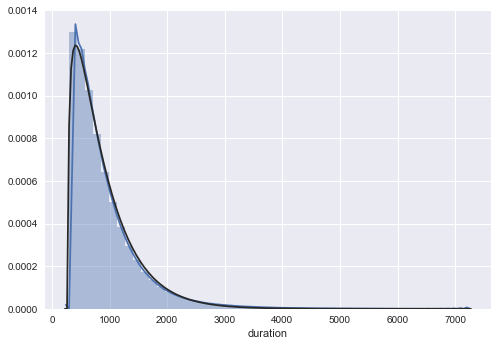

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from scipy import stats
sns.distplot(df['duration'], fit = stats.gamma)

<h2>Plot the scatter plot between trip_distance and duration</h2>

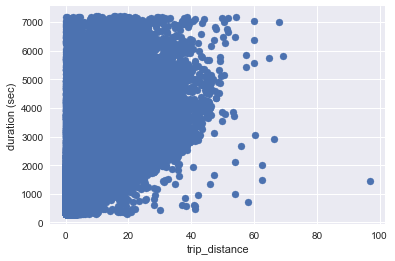

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['trip_distance'],df['duration'])
plt.ylabel('duration (sec)')
plt.xlabel('trip_distance') 
plt.show()

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [11]:
df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x:datetime.date.isoweekday(x))

<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [12]:
df['time_of_day'] = df['tpep_pickup_datetime'].apply(lambda x:datetime.datetime.strftime(x,'%H'))

<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

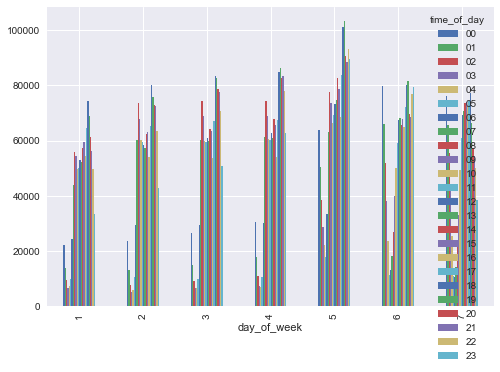

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

grouped = df.groupby(['day_of_week','time_of_day'])
grouped.size().unstack().plot(kind='bar')

<h2>Create zones</h2>

In [14]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    import numpy as np
    lat = np.linspace(southlimit,northlimit,zone_factor+1)
    long = np.linspace(westlimit,eastlimit,zone_factor+1)
    counter = 0
    
    for i in range(zone_factor):
        for j in range(zone_factor):
            zone_table.append(("%2d"%(counter),
                              [[lat[i],long[j]],
                              [lat[i],long[j+1]],
                              [lat[i+1],long[j]],
                              [lat[i+1],long[j+1]],
                              [lat[i],long[j]]
                              ]))
            counter+=1
    return zone_table

Example of a zone table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11022999999999],
   [40.533, -74.11022999999999],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11022999999999],
   [40.4856, -74.05913999999999],
   [40.533, -74.05913999999999],
   [40.533, -74.11022999999999],
   [40.4856, -74.11022999999999]]),

In [15]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    
    #Your code goes here
    for i in zone_table:
        c_ord = list()
        c_ord.append(i[1])
        data_point = { "geometry": {"type": "Polygon", "coordinates": c_ord},
                      "properties": {"zone_id": i[0]}, "type":"Feature"}
        
        zone_data_dict_features.append(data_point)
    
    zone_data_dict['features'] = zone_data_dict_features

    return zone_data_dict

Example of the 'features' list in the geojson object

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11022999999999, 40.4856],
      [-74.11022999999999, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},

<h3>Create the zone table for zone_factor = 10</h3>

In [16]:
zone_factor = 10
zone_table = createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(40.65,-74.19)</span> the function should return "31"

In [17]:
def get_zone(lat,lon,zone_table):
    zone = ''
    for i in zone_table:
        if lat>=i[1][0][0] and lat<=i[1][-2][0] and lon>=i[1][0][1] and lon<=i[1][-2][1]:
            zone = str(i[0])
    return zone

<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [18]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [19]:
df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_latitude'],x['pickup_longitude'],zone_table),axis=1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_latitude'],x['dropoff_longitude'],zone_table),axis=1)

<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [20]:
count_same_zone = len(df[df['pickup_zone']==df['dropoff_zone']])
total_rides = len(df)
pct_same_zone = round((count_same_zone/total_rides)*100,2)

print('~Percent of Total Rides where pickup zone == dropoff zone: '+str(pct_same_zone)+'%')

~Percent of Total Rides where pickup zone == dropoff zone: 46.4%


In [21]:
import pandas as pd
pickup_groups = df.groupby('pickup_zone')
sizes = pd.DataFrame(pickup_groups.size())
import pandas as pd
sizes.rename(columns={0:"size"},inplace=True)
sizes.reset_index(level=0, inplace=True)
sizes['pickup_zone'] = sizes['pickup_zone']
nn = sizes.sort_values(by='size',ascending=False)[:5]
print('Top 5 Zones with highest pickups')
nn

Top 5 Zones with highest pickups


,pickup_zone,size
44,55,5608980
54,65,1111250
55,66,587260
35,45,526809
34,44,294646


In [22]:
import pandas as pd
dropoff_groups = df.groupby('dropoff_zone')
sizes_d = pd.DataFrame(dropoff_groups.size())
import pandas as pd
sizes_d.rename(columns={0:"size"},inplace=True)
sizes_d.reset_index(level=0, inplace=True)
sizes_d['dropoff_zone'] = sizes_d['dropoff_zone']
dd = sizes_d.sort_values(by='size',ascending=False)[:5]
print('Top 5 Zones with highest dropoffs')
dd
## use for folium

Top 5 Zones with highest dropoffs


,dropoff_zone,size
49,55,5001971
59,65,1118230
60,66,740991
39,45,640846
38,44,300440


<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


In [60]:
df['time_of_day'] = pd.to_numeric(df['time_of_day'])

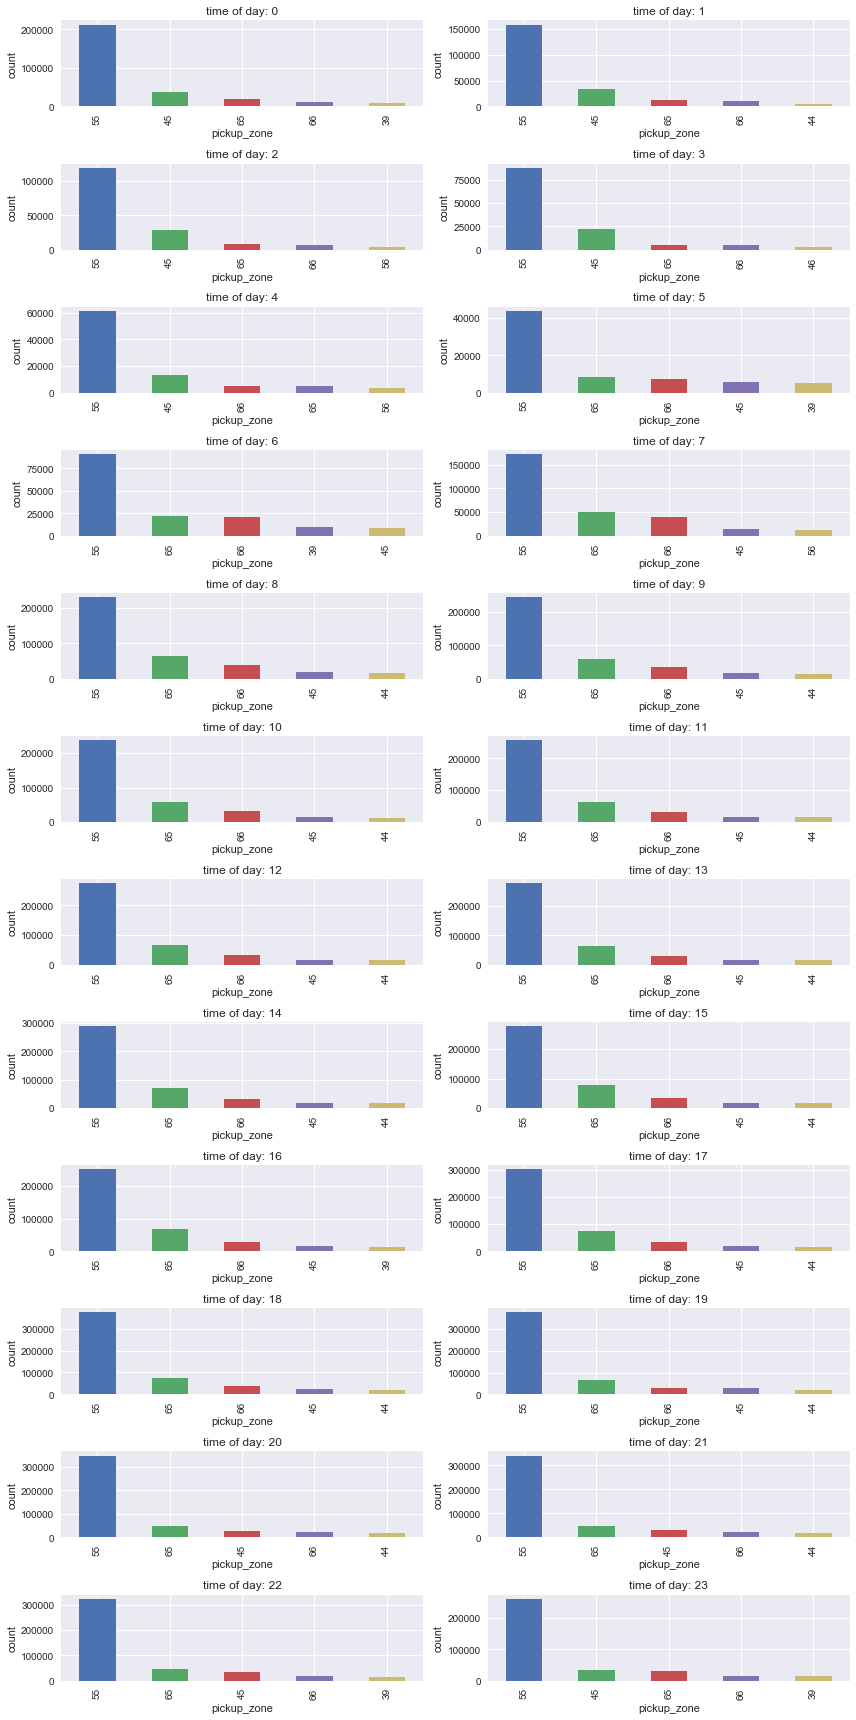

In [62]:
grouped_a = df.groupby(['pickup_zone','time_of_day']).size().unstack()
size_a = pd.DataFrame(grouped_a)
col_num_a = 2
row_num_a = 12
import matplotlib.pyplot as plt
fig, axes = plt.subplots(row_num_a, col_num_a, figsize=(12,24))

for i,(time_of_day,zone_count) in enumerate(size_a.items()):
    ax = axes[int(i/col_num_a), i%col_num_a]
    zone_count = zone_count.sort_values(ascending=False)[:5]
    zone_count.plot(kind='bar',ax=ax)
    ax.set_title('time of day: '+str(time_of_day))
    ax.set_xlabel('pickup_zone')
    ax.set_ylabel('count') 

plt.tight_layout()

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

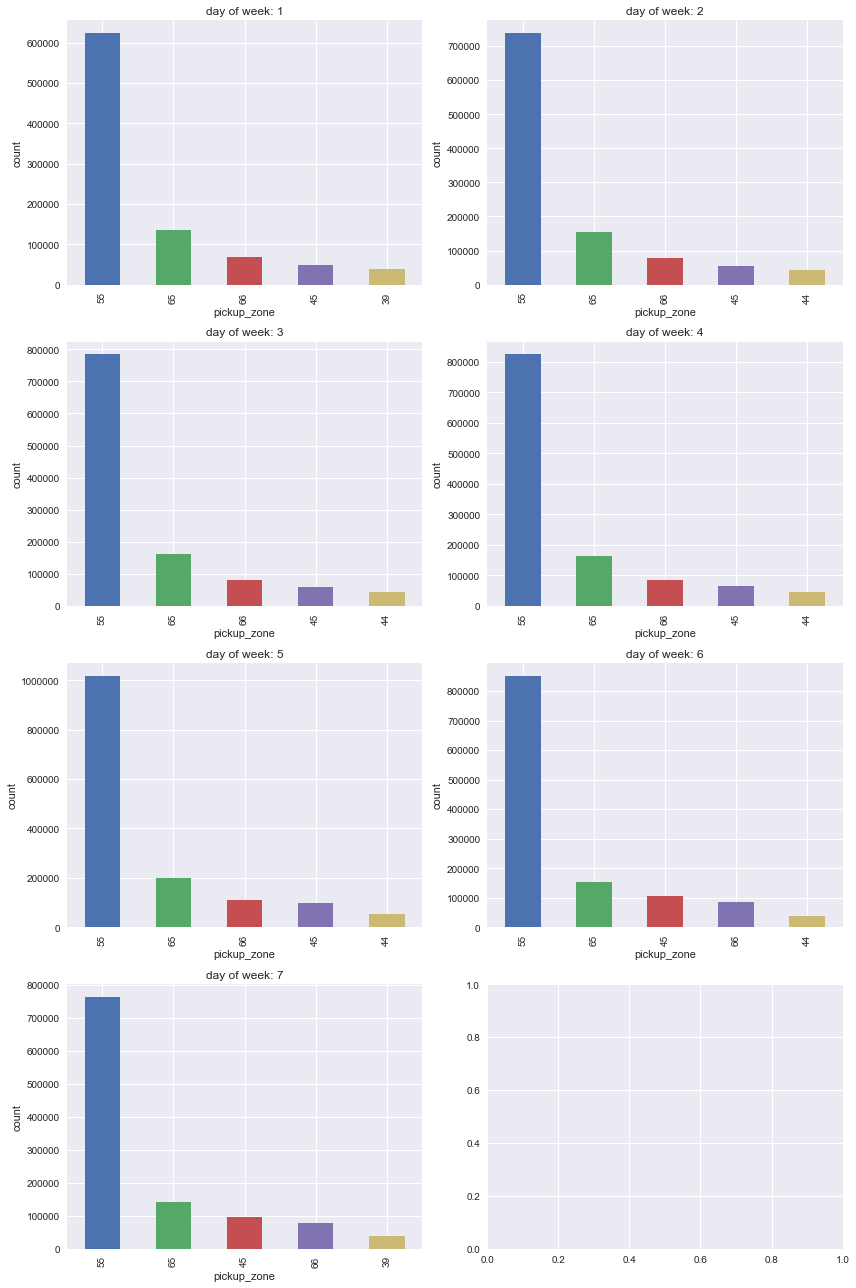

In [53]:
df['day_of_week'] = pd.to_numeric(df['day_of_week'])
grouped_b=df.groupby(['pickup_zone','day_of_week']).size().unstack()
col_num_b=2
row_num_b=4
import matplotlib.pyplot as plt
fig, axes = plt.subplots(row_num_b, col_num_b, figsize=(12,18))

for i,(day_of_week,zone_count) in enumerate(grouped_b.items()):
    ax=axes[int(i/col_num_b),i%col_num_b]
    zone_count=zone_count.sort_values(ascending=False)[:5]
    zone_count.plot(kind='bar',ax=ax)
    ax.set_title('day of week: '+str(day_of_week))
    ax.set_xlabel('pickup_zone')
    ax.set_ylabel('count')

plt.tight_layout()

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



In [32]:
import pandas as pd
z = df[df['day_of_week']<6]
z = z[z['time_of_day']<=9]
z = z[z['time_of_day']>=8]


pickup_groups = z.groupby(['pickup_zone', 'time_of_day'])
sizes_c = pd.DataFrame(pickup_groups.size())
import pandas as pd
sizes_c.rename(columns={0:"size"},inplace=True)
sizes_c.reset_index(level=0, inplace=True)
sizes_c['pickup_zone'] = sizes_c['pickup_zone']
ff = sizes_c.sort_values(by='size',ascending=False)[:5]
print('Top 5 pickup zones between 8am-9am on weekday: ')
ff

Top 5 pickup zones between 8am-9am on weekday: 


,pickup_zone,size
time_of_day,,
9,55,205264
8,55,205143
8,65,55599
9,65,48026
8,66,33356


<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the counts dataframe (see class example)

In [35]:
gdf = createGeoJsonObject(zone_table)
gdf

{'type': 'FeatureCollection',
 'features': [{'geometry': {'type': 'Polygon',
    'coordinates': [[[40.4856, -74.2635],
      [40.4856, -74.21240999999999],
      [40.533, -74.2635],
      [40.533, -74.21240999999999],
      [40.4856, -74.2635]]]},
   'properties': {'zone_id': ' 0'},
   'type': 'Feature'},
  {'geometry': {'type': 'Polygon',
    'coordinates': [[[40.4856, -74.21240999999999],
      [40.4856, -74.16131999999999],
      [40.533, -74.21240999999999],
      [40.533, -74.16131999999999],
      [40.4856, -74.21240999999999]]]},
   'properties': {'zone_id': ' 1'},
   'type': 'Feature'},
  {'geometry': {'type': 'Polygon',
    'coordinates': [[[40.4856, -74.16131999999999],
      [40.4856, -74.11023],
      [40.533, -74.16131999999999],
      [40.533, -74.11023],
      [40.4856, -74.16131999999999]]]},
   'properties': {'zone_id': ' 2'},
   'type': 'Feature'},
  {'geometry': {'type': 'Polygon',
    'coordinates': [[[40.4856, -74.11023],
      [40.4856, -74.05914],
      [40.533, 

In [69]:
sizes_d2 = sizes_d
sizes_d2.reset_index(level=0, inplace=True)
sizes_d2.rename(columns={'dropoff_zone':'zone_id'}, inplace=True)
import folium
m = folium.Map(location = [40.7589,-73.9851],zoom_start=13)
m.choropleth(geo_data = gdf, 
             name = 'dropoff zone choropleth',
             data = sizes_d2,
             columns = ['zone_id','size'],
             key_on = 'feature.properties.zone_id',
             fill_color = 'RdYlGn', 
             fill_opacity=0.9, 
             line_opacity=1,
             legend_name = 'ride frequency size heatmap')
folium.LayerControl().add_to(m)

In [70]:
m